In [1]:
import numpy as np
import pandas as pd
import math
import sys

In [13]:
# subir angulos y distancia paara regresion
df = pd.read_excel('angulos y distancias para regresion 10 casos brazo azul.xlsx')
df1 = pd.read_excel('angulo S0 para regresion brazo azul.xlsx')
print(df.head())
print(df.shape)
print(df1.head())
print(df1.shape)

   distancia  S1  S2  S3
0         10  80  97  72
1         12  75  92  67
2         14  65  85  64
3         16  55  75  60
4         18  47  67  58
(11, 4)
   angulo     S0
0      23   0.01
1      27   5.00
2      30  10.00
3      35  15.00
4      40  20.00
(35, 2)


In [17]:
# Create separate object for target variable

y1 = df.S1
y1 = y1.as_matrix()

y2 = df.S2
y2 = y2.as_matrix()

y3 = df.S3
y3 = y3.as_matrix()

y0 = df1.S0
y0 = y0.as_matrix()

# Create separate object for input features
X = df.distancia
X = X.as_matrix()
X = X.reshape(-1, 1)

# crear X paraS0
X0 = df1.angulo
X0 = X0.as_matrix()
X0 = X0.reshape(-1, 1)

In [48]:
from sklearn.metrics import make_scorer
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_ = poly.fit_transform(X)
X0_ = poly.fit_transform(X0)

In [49]:
clf1 = linear_model.LinearRegression()
clf1.fit(X_, y1)
predictions1 = clf1.predict(X_)

clf2 = linear_model.LinearRegression()
clf2.fit(X_, y2)
predictions2 = clf2.predict(X_)

clf3 = linear_model.LinearRegression()
clf3.fit(X_, y3)
predictions3 = clf3.predict(X_)

clf0 = linear_model.LinearRegression()
clf0.fit(X0_, y0)
predictions0 = clf0.predict(X0_)

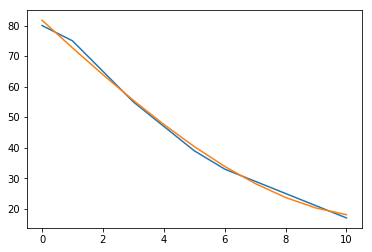

In [50]:
import matplotlib.pyplot as plt
plt.plot(y1)
plt.plot(predictions1)
plt.show()


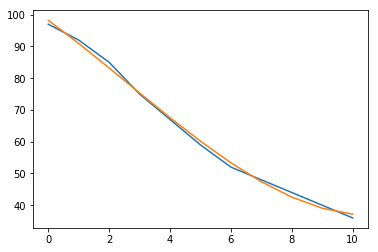

In [51]:
plt.plot(y2)
plt.plot(predictions2)
plt.show()

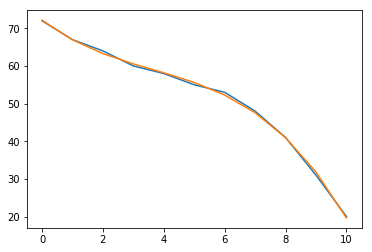

In [52]:
plt.plot(y3)
plt.plot(predictions3)
plt.show()

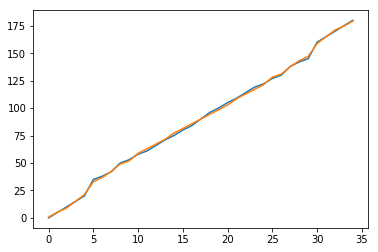

In [53]:
plt.plot(y0)
plt.plot(predictions0)
plt.show()

In [61]:
# Entrar las coordenadas para estimar los angulos de los 4 DOF
coordx = 30
coordy = 20

# Predecir angulos de los 4 DOF a partir de coordenadas X y Y
para_dist = ((coordx-20)*(coordx-20)) + coordy*coordy
distancia = np.array(math.sqrt(para_dist)).reshape(1, -1)
distancia_ = poly.fit_transform(distancia)

cos_angulo = (coordx-20)/distancia
angulo = math.degrees(math.acos(cos_angulo))
angulo_ = poly.fit_transform(angulo)

S1 = clf1.predict(distancia_)
S2 = clf2.predict(distancia_)
S3 = clf3.predict(distancia_)
S0 = clf0.predict(angulo_)

print('Angulo teorico = ',angulo)
print('Distancia = ',distancia)
#print('S0 = ',y_pred_angulo.round(0))
print('S0 = ',S0.round(0))
print('S1 = ',S1.round(0))
print('S2 = ',S2.round(0))
print('S3 = ',S3.round(0))


Angulo teorico =  63.43494882292201
Distancia =  [[ 22.36067977]]
S0 =  [ 52.]
S1 =  [ 33.]
S2 =  [ 52.]
S3 =  [ 52.]
